In [8]:
# Importing Data processing libraries
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()

# Plotting Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [10]:
data = pd.read_csv('bank_churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


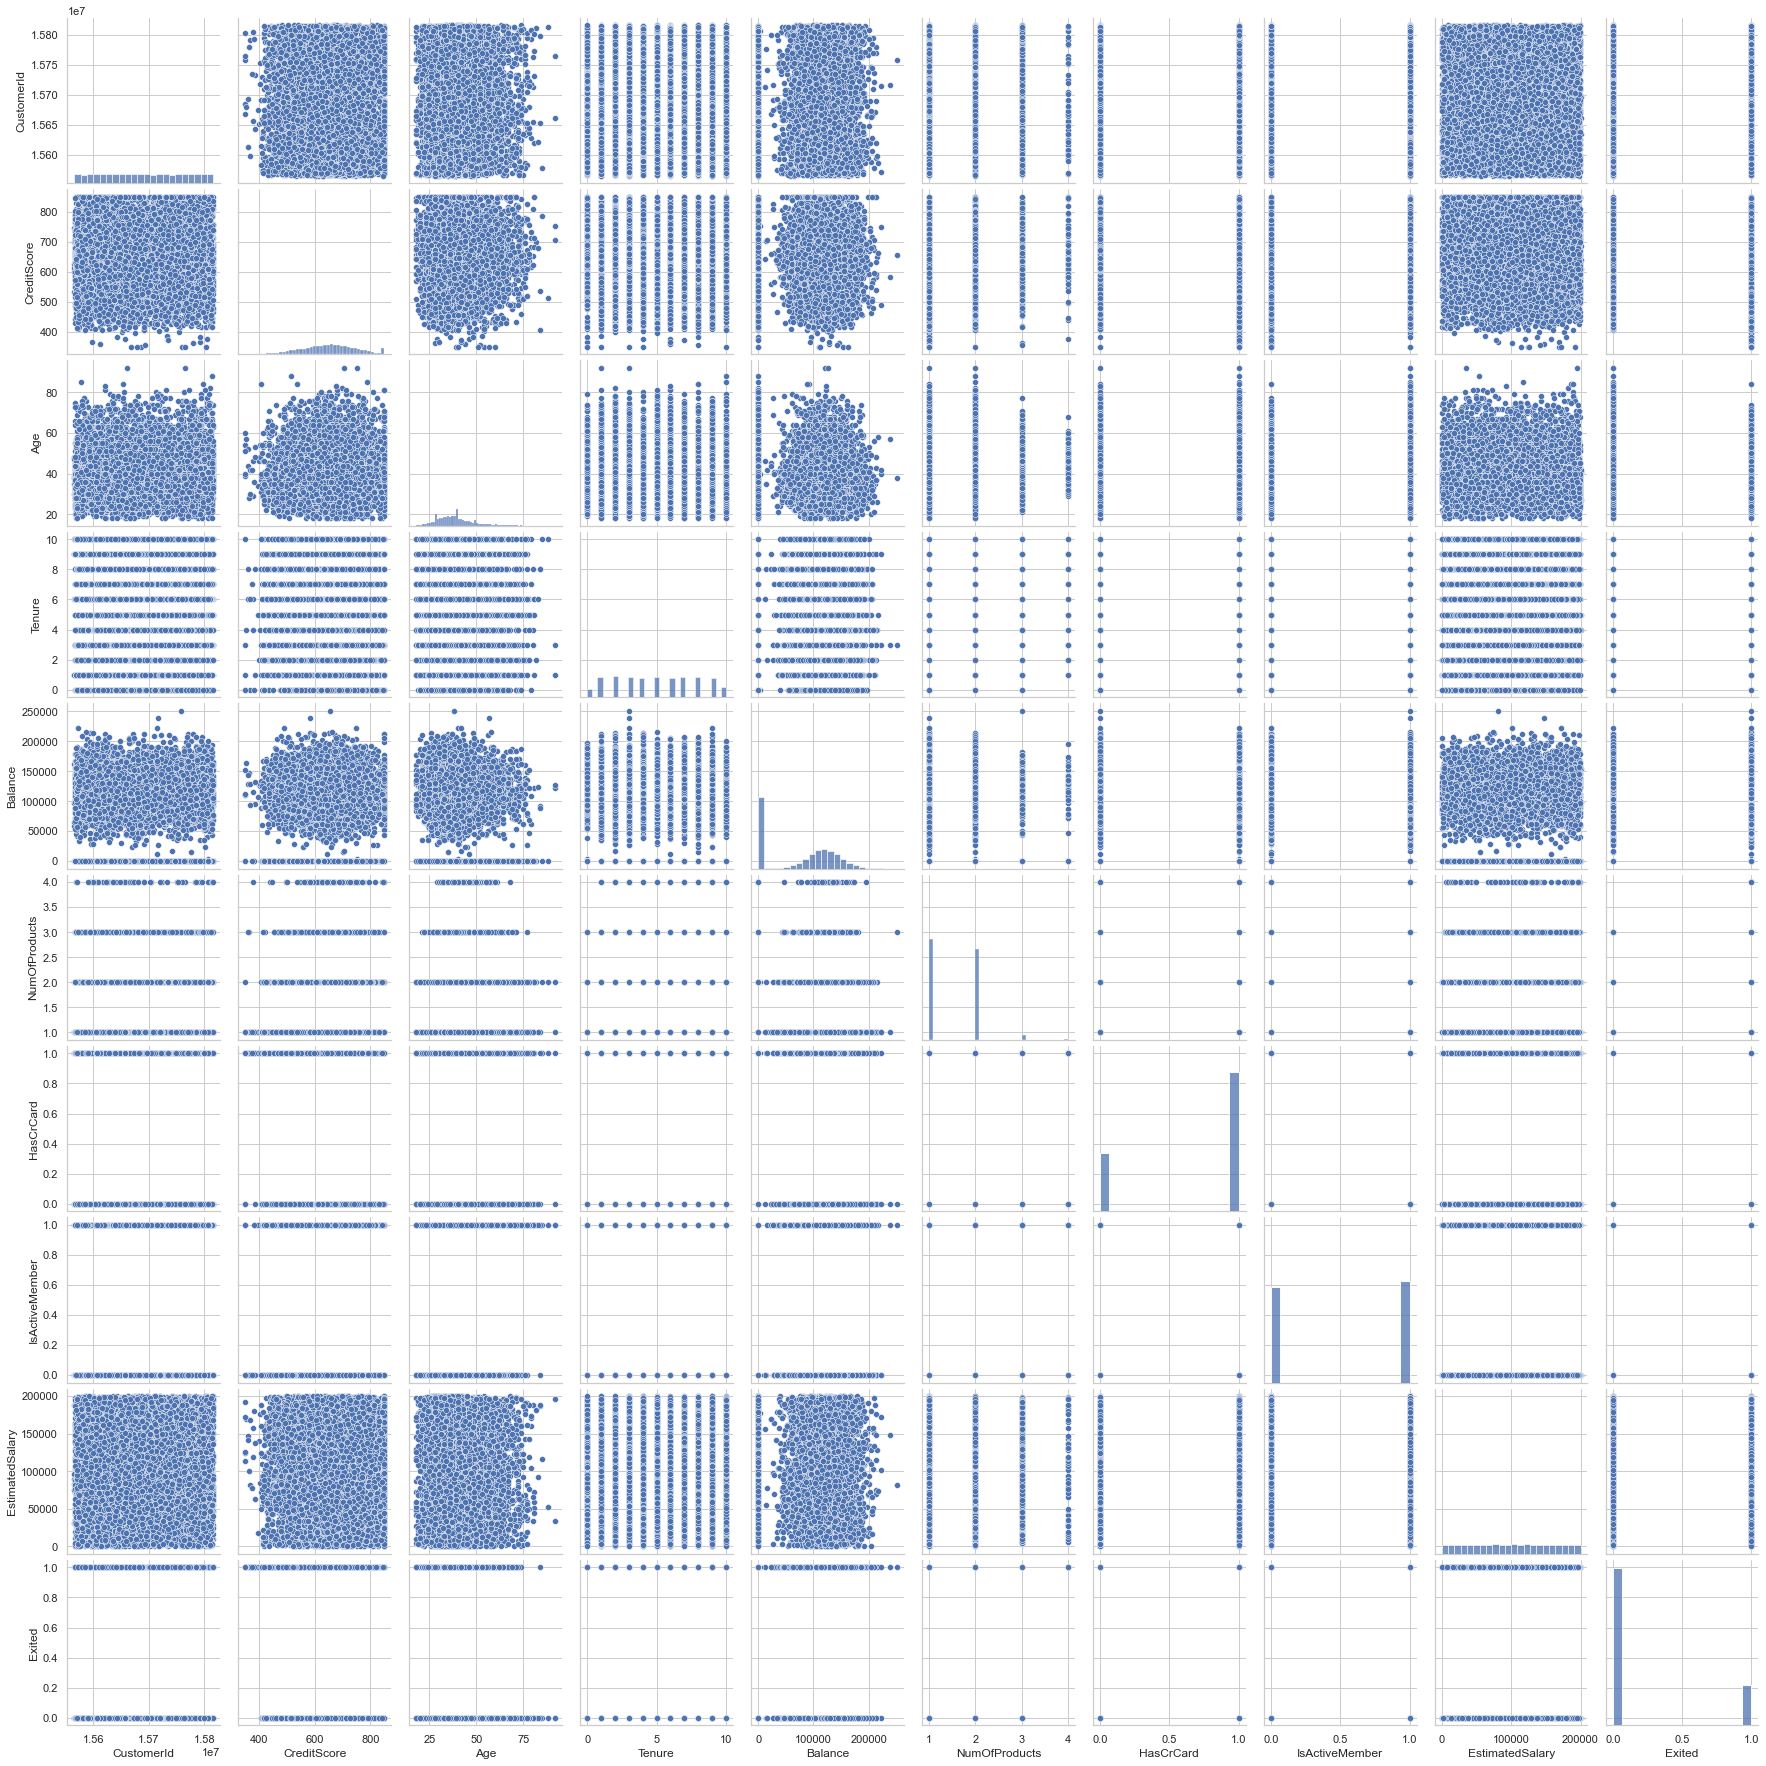

In [22]:
sns.pairplot(data)

In [23]:
data.shape
#(row, column)

(10000, 13)

In [24]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Univariate Analysis

In [26]:
data["Exited"].unique()

array([1, 0], dtype=int64)

In [27]:
keluar = data.loc[data["Exited"] == 1]
tidak_keluar = data.loc[data["Exited"] == 0]

keluar

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


<AxesSubplot:xlabel='CreditScore'>

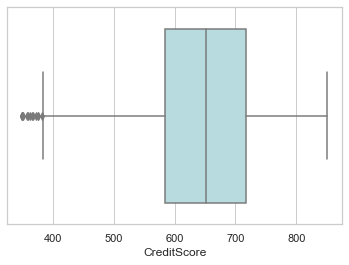

In [28]:
sns.boxplot(x = data['CreditScore'], color='powderblue')

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

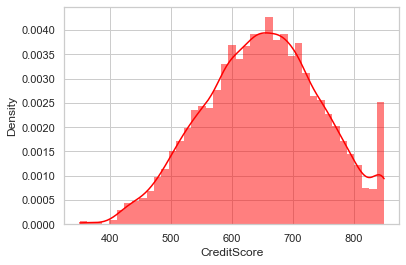

In [29]:
sns.histplot(x = data['CreditScore'], color='red', kde=True, stat='density', linewidth=0)

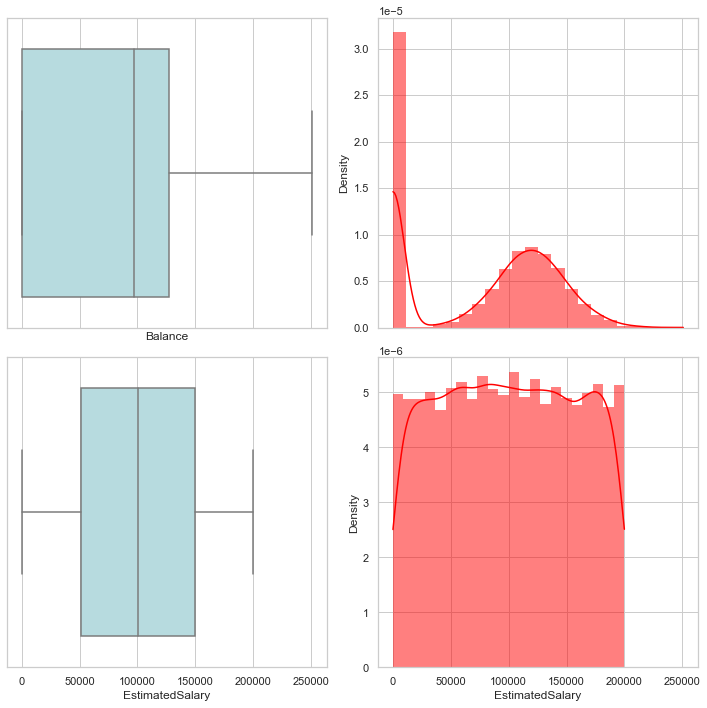

In [30]:
f, axes=plt.subplots(ncols=2, nrows=2, figsize=(10,10), sharex=True)

column=['Balance', 'EstimatedSalary']
for i in range(2):
    sns.boxplot(x = data[column[i]], ax=axes[i][0], color='powderblue')
    sns.histplot(data = data[column[i]], ax=axes[i][1], color='red', kde=True, stat='density', linewidth=0)
    
    plt.tight_layout()

<AxesSubplot:xlabel='Exited', ylabel='count'>

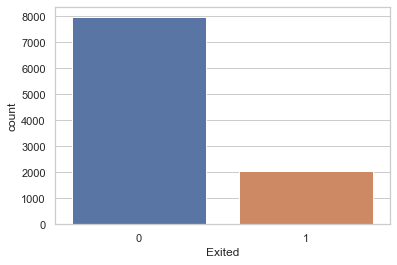

In [31]:
sns.countplot(x=data['Exited'])

## Bivariate Data Analysis
---

### Credit Score vs Exited

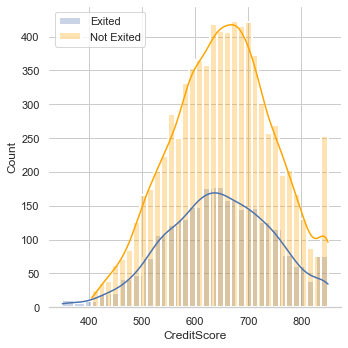

In [32]:
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)

sns.histplot(data=keluar["CreditScore"],label="Exited",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=tidak_keluar["CreditScore"],label="Not Exited",kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

Costumer yang memiliki credit score tinggi cenderung 'Not Exited', sedangkan yang memilki credit score rendah cenderung 'Exited.

### Estimated Salary vs Exited 

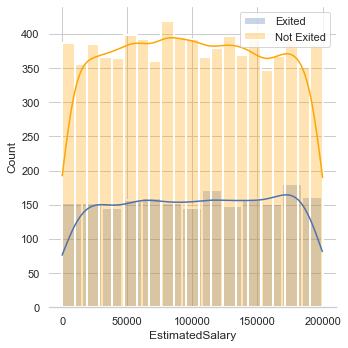

In [33]:
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)

sns.histplot(data=keluar["EstimatedSalary"],label="Exited",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=tidak_keluar["EstimatedSalary"],label="Not Exited",kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

Costumer yang memiliki Estimated Salary kebanyakan tidak akan keluar atau 'Not Exited', sedangkan yang memiliki Estimated Salary rendah cenderung keluar atau 'Exited'

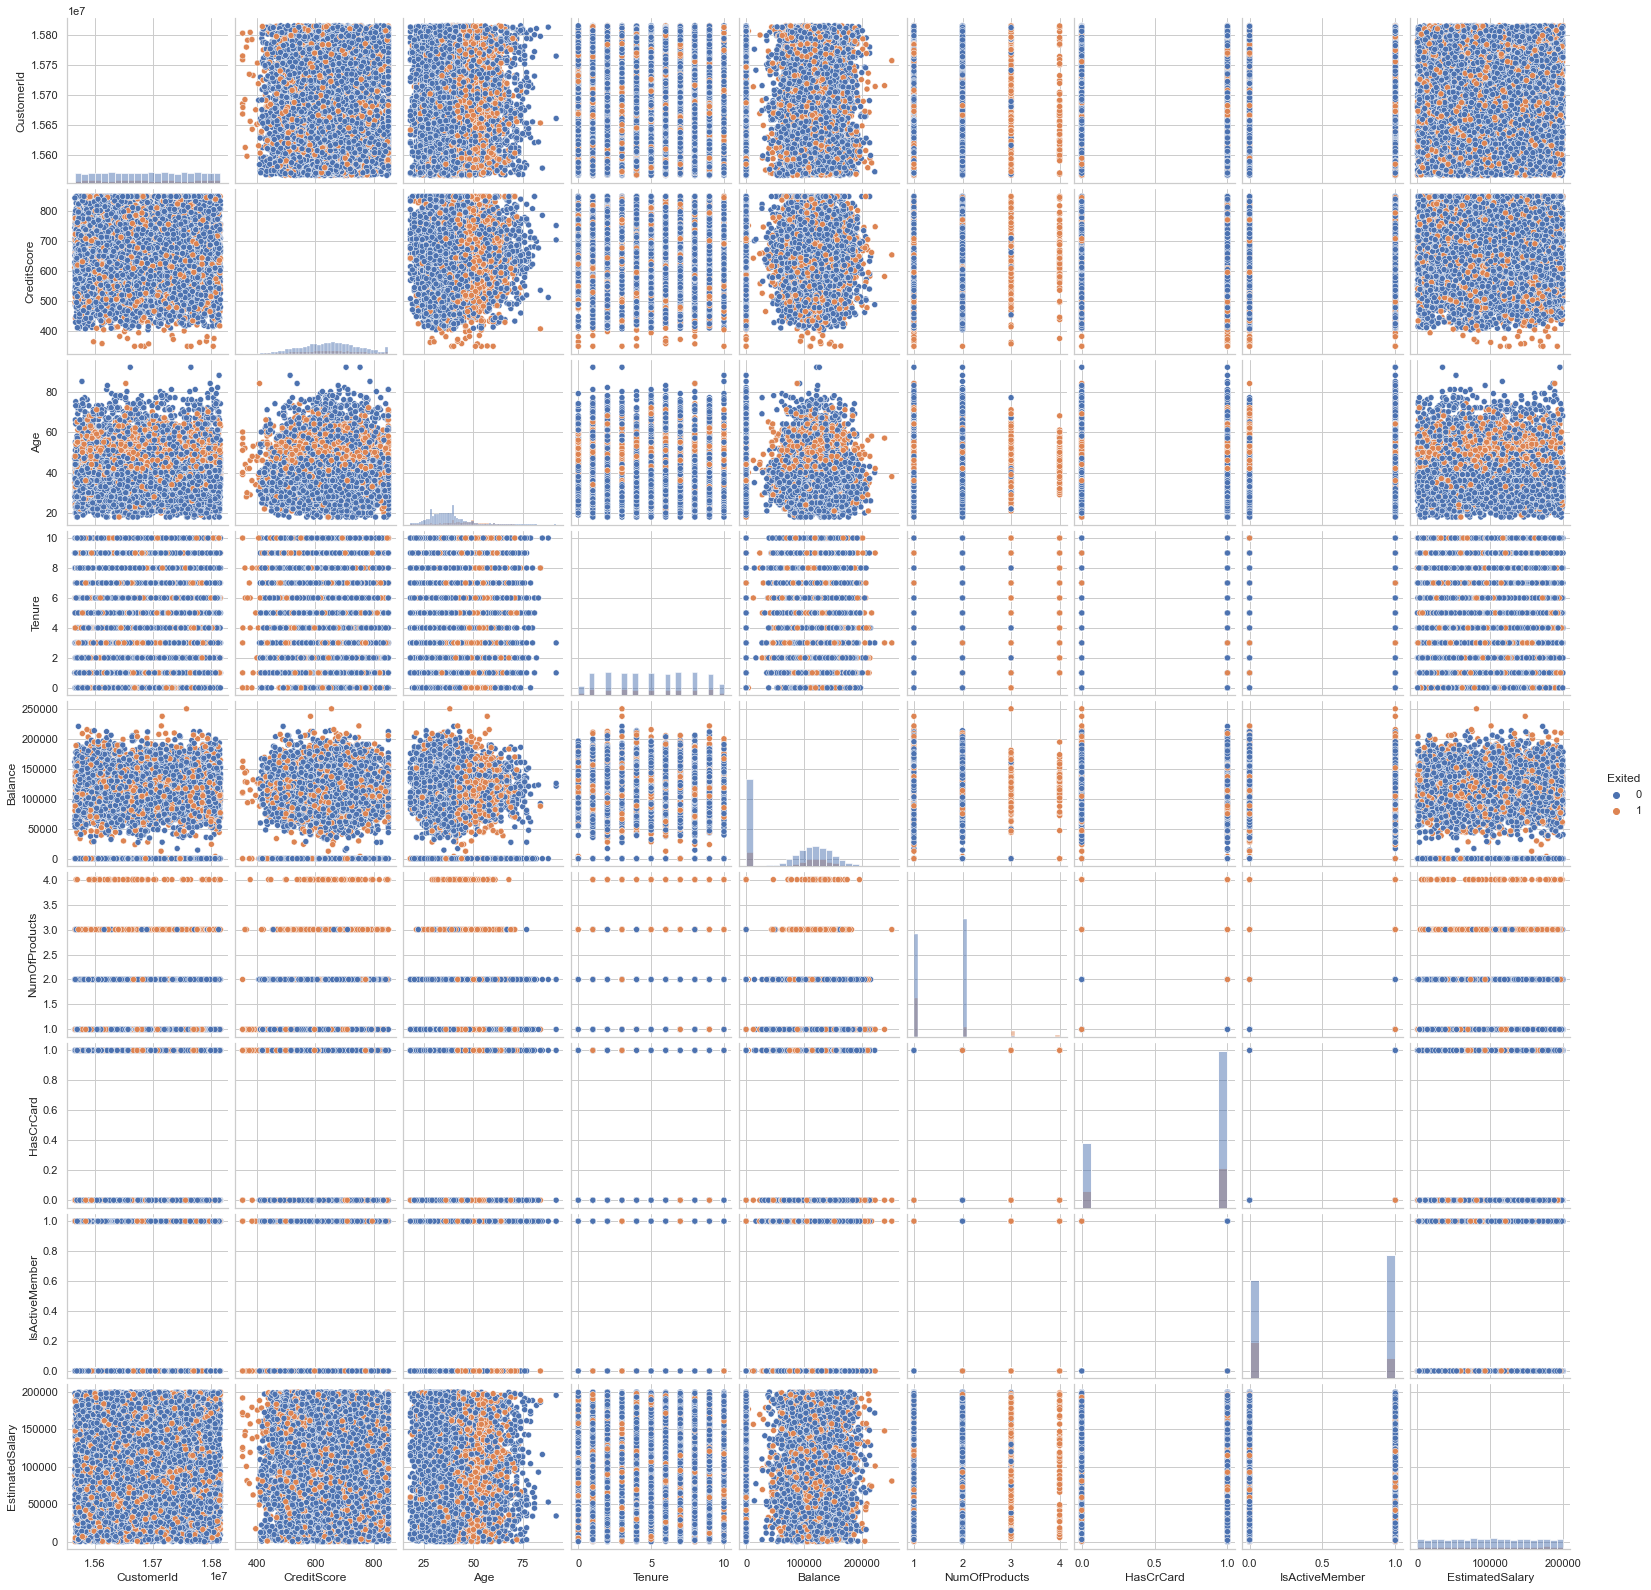

In [34]:
sns.pairplot(data, hue="Exited", diag_kind="hist")
plt.show()

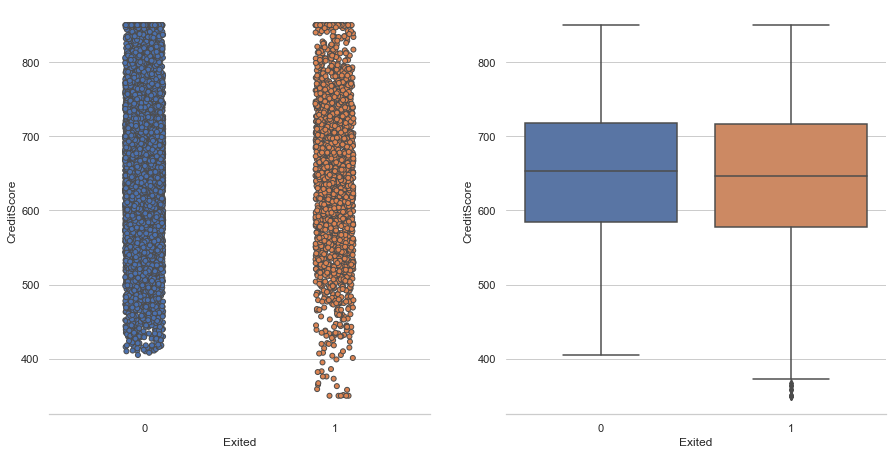

In [35]:
f, axes = plt.subplots(ncols = 2, figsize=(15, 7.5), sharex=True)
sns.despine(left=True)

sns.stripplot(x=data['Exited'], y=data['CreditScore'], ax=axes[0], linewidth=1)
sns.boxplot(x=data['Exited'], y=data['CreditScore'], ax=axes[1])

plt.show()

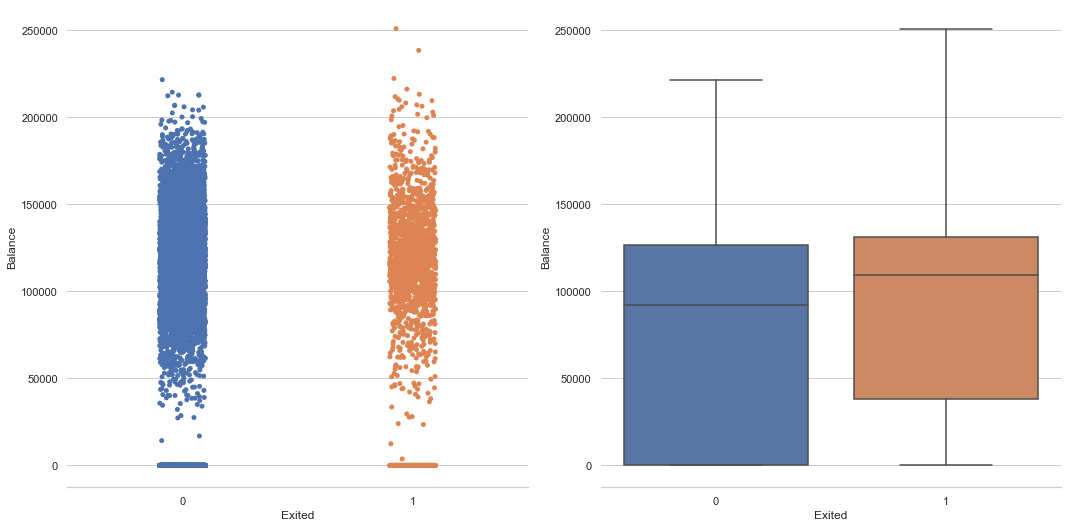

In [36]:
f, axes = plt.subplots(ncols = 2, figsize=(15, 7.5), sharex=True)
sns.despine(left=True)

sns.stripplot(x=data['Exited'], y=data['Balance'], ax=axes[0])
sns.boxplot(x=data['Exited'], y=data['Balance'], ax=axes[1])

plt.tight_layout()